## 🌐 Tech-Workshop: 
### Principal Component Analysis (PCA)
En este script se utiliza un archivo countries_data.csv que contiene informacion de 21 países.
De cada país disponemos de 10 atributos descriptivos todos de carácter númerico

Las variables corresponden a los siguientes indicadores:

1. **X1** = Tasa anual de crecimiento de la población
2. **X2** = Tasa de mortalidad infantil por cada 1000 nacidos vivos
3. **X3** = Porcentaje de mujeres en la población activa
4. **X4** = PNB en 1995 (en millones de dólares)
5. **X5** = Producción de electricidad (en millones kW/h)
6. **X6** = Líneas telefónicas por cada 1000 habitantes
7. **X7** = Consumo de agua per cápita
8. **X8** = Proporción de la superficie del país cubierta por bosques
9. **X9** = Proporción de deforestación anual
10. **X10** = Consumo de energía per cápita
11. **X11** = Emisión de CO2 per cápita

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('countries_data.csv')
print(data)

            Pais   X1   X2  X3      X4      X5   X6    X7  X8   X9   X10   X11
0        Albania  1.0   30  41    2199    3903   12    94  53  0.0   341   1.2
1         Angola  3.0  124  46    4422     955    6    57  19  0.7    89   0.5
2   Arabia Saudi  4.3   21  13  133540   91019   96   497   1  0.0  4566  13.1
3        Argelia  2.5   34  24   44609   19883   42   180   2  0.8   906   3.0
4      Argentina  1.3   22  31  278431   65962  160  1043  22  0.1  1504   3.5
5      Australia  1.4    6  43  337909  167155  510   933  19  0.0  5341  15.3
6        Austria  0.6    6  41  216547   53259  465   304  47 -0.4  3301   7.2
7     Bangladesh  2.0   79  42   28599    9891    2   220   6  4.1    64   0.2
8        Belgica  0.3    8  40  250710   72236  457   917  20 -0.3  5120  10.1
9          Benin  3.0   95  48    2034       6    5    26  45  1.3    20   0.1
10     Tailandia  1.3   35  46  159630   71177   59   602  25  3.5   769   2.0
11      Tanzania  3.1   82  49    3703    1913    3 

In [37]:
# Standarización de datos media 0 y varianza 1
 
datos_a_numpy = data.to_numpy()
numerical_attr_pre_standarizacion = data.select_dtypes(include=[np.number])

# nos quedanmos con las columnas numericas
country_name = data.iloc[:, 0]
numerical_attr = StandardScaler().fit_transform(numerical_attr_pre_standarizacion)
print(numerical_attr)

[[-0.90222646 -0.4823389   0.27207837 -0.82502775 -0.75494886 -0.70342843
  -1.00917777  1.77658586 -0.46612489 -0.64242932 -0.59134544]
 [ 0.8440183   2.16248609  0.83223972 -0.80362013 -0.80844199 -0.74124071
  -1.13419868 -0.28934623  0.07340549 -0.78812188 -0.74305186]
 [ 1.9790774  -0.73556683 -2.86482519  0.43979377  0.82582026 -0.17405652
   0.35253643 -1.38307499 -0.46612489  1.80023369  1.98766373]
 [ 0.40745711 -0.36979316 -1.63247022 -0.41661697 -0.46498272 -0.51436703
  -0.71858864 -1.32231228  0.15048126 -0.31577734 -0.20124321]
 [-0.64028975 -0.70743039 -0.84824433  1.83510258  0.37114681  0.22927445
   2.19743955 -0.10705811 -0.38904912  0.02995342 -0.09288148]
 [-0.55297751 -1.15761337  0.49614291  2.4078792   2.20735106  2.43499072
   1.82575577 -0.28934623 -0.46612489  2.24829613  2.46445534]
 [-1.25147541 -1.15761337  0.27207837  1.23915603  0.14064369  2.15139863
  -0.29959965  1.41200961 -0.77442796  1.06888015  0.70899532]
 [-0.02910408  0.89634646  0.38411064 -0.

In [38]:
# Media = 0
print("Mediana datos no standarizados", "\n", "-------------------", "\n", np.mean(numerical_attr_pre_standarizacion, axis=0))
print("Mediana datos standarizados", "\n", "-------------------", "\n",  np.mean(numerical_attr, axis=0))

Mediana datos no standarizados 
 ------------------- 
 X1         2.033333
X2        47.142857
X3        38.571429
X4     87871.142857
X5     45508.142857
X6       123.619048
X7       392.666667
X8        23.761905
X9         0.604762
X10     1452.190476
X11        3.928571
dtype: float64
Mediana datos standarizados 
 ------------------- 
 [-3.11919802e-16 -1.16309079e-16  2.59052039e-16  3.70074342e-17
  2.64338815e-17 -2.11471052e-17 -1.11022302e-16 -3.79987047e-17
  1.28204325e-16  1.58603289e-17  1.26882631e-16]


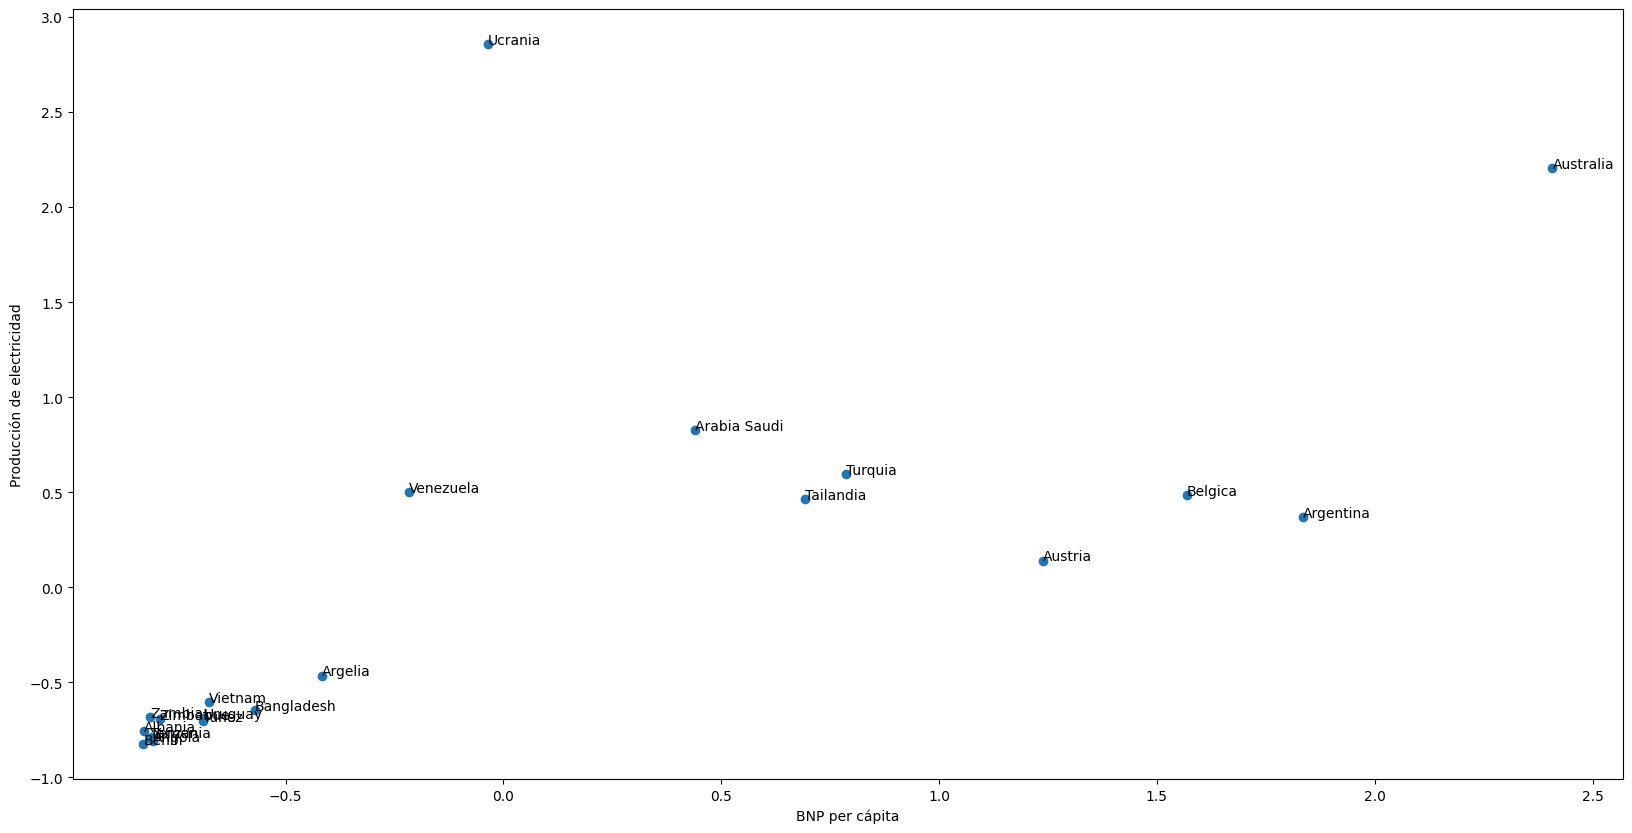

In [39]:
# Ejercicio 1 (comparación de dos variables con alta correlación)
x = numerical_attr[:, 3] # BNP per cápita
y = numerical_attr[:, 4] # Producción de electricidad

plt.figure(figsize=(20, 10))
plt.scatter(x, y)

plt.xlabel('BNP per cápita')
plt.ylabel('Producción de electricidad')

for i, txt in enumerate(country_name):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

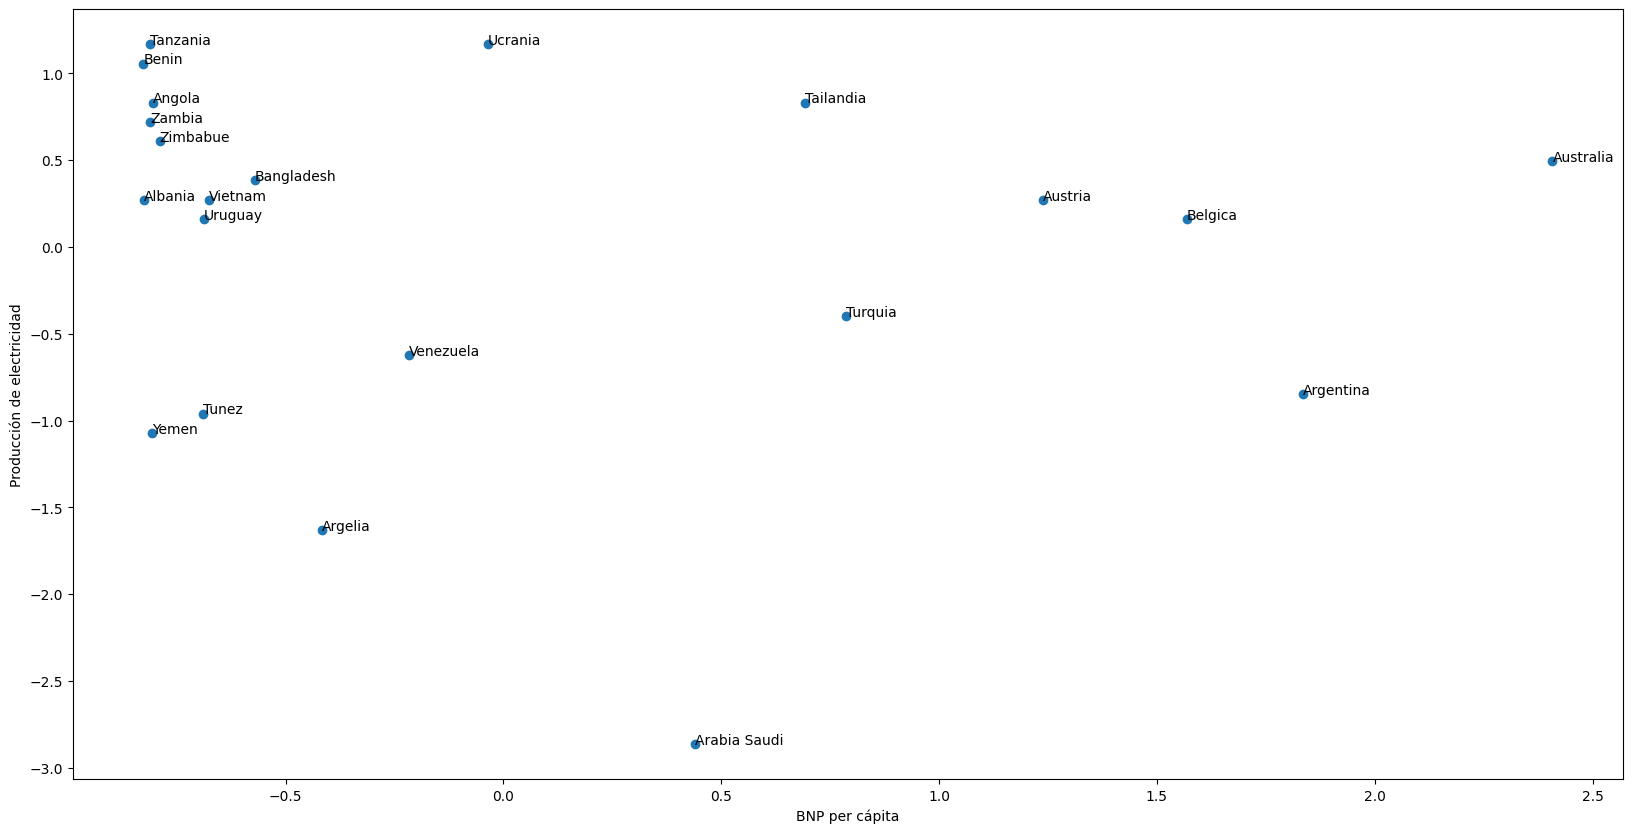

In [40]:
# Ejercicio 2 (dos viarbles que no estan muy correlacionadas, candidatas a PCA)
x = numerical_attr[:, 3] # BNP per cápita
y = numerical_attr[:, 2] # % de mujeres en la poblacion activa

plt.figure(figsize=(20, 10))
plt.scatter(x, y)

plt.xlabel('BNP per cápita')
plt.ylabel('Producción de electricidad')

for i, txt in enumerate(country_name):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

In [41]:
# Cálculo de las componentes principales
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(numerical_attr)
print(principalComponents)

[[-1.31524614  1.34818834]
 [-2.80983558 -0.00682188]
 [ 2.11594155 -3.90015155]
 [-0.73486688 -1.96026046]
 [ 2.15416938 -0.29754134]
 [ 5.52562102  0.45783495]
 [ 2.55683005  1.55235816]
 [-2.23415685  0.30144803]
 [ 4.27490661  0.57376695]
 [-2.82062113  1.0853352 ]
 [ 0.03213844  1.45350138]
 [-2.65445789  0.88162806]
 [-0.50811292 -1.77426702]
 [ 0.81712005 -0.04253387]
 [ 3.14684992  1.0214265 ]
 [-0.09526161 -0.07999796]
 [ 0.3882105   0.38014797]
 [-1.39983048  0.30455476]
 [-2.15334611 -2.22426054]
 [-2.51944205  0.9042253 ]
 [-1.76660989  0.02141903]]


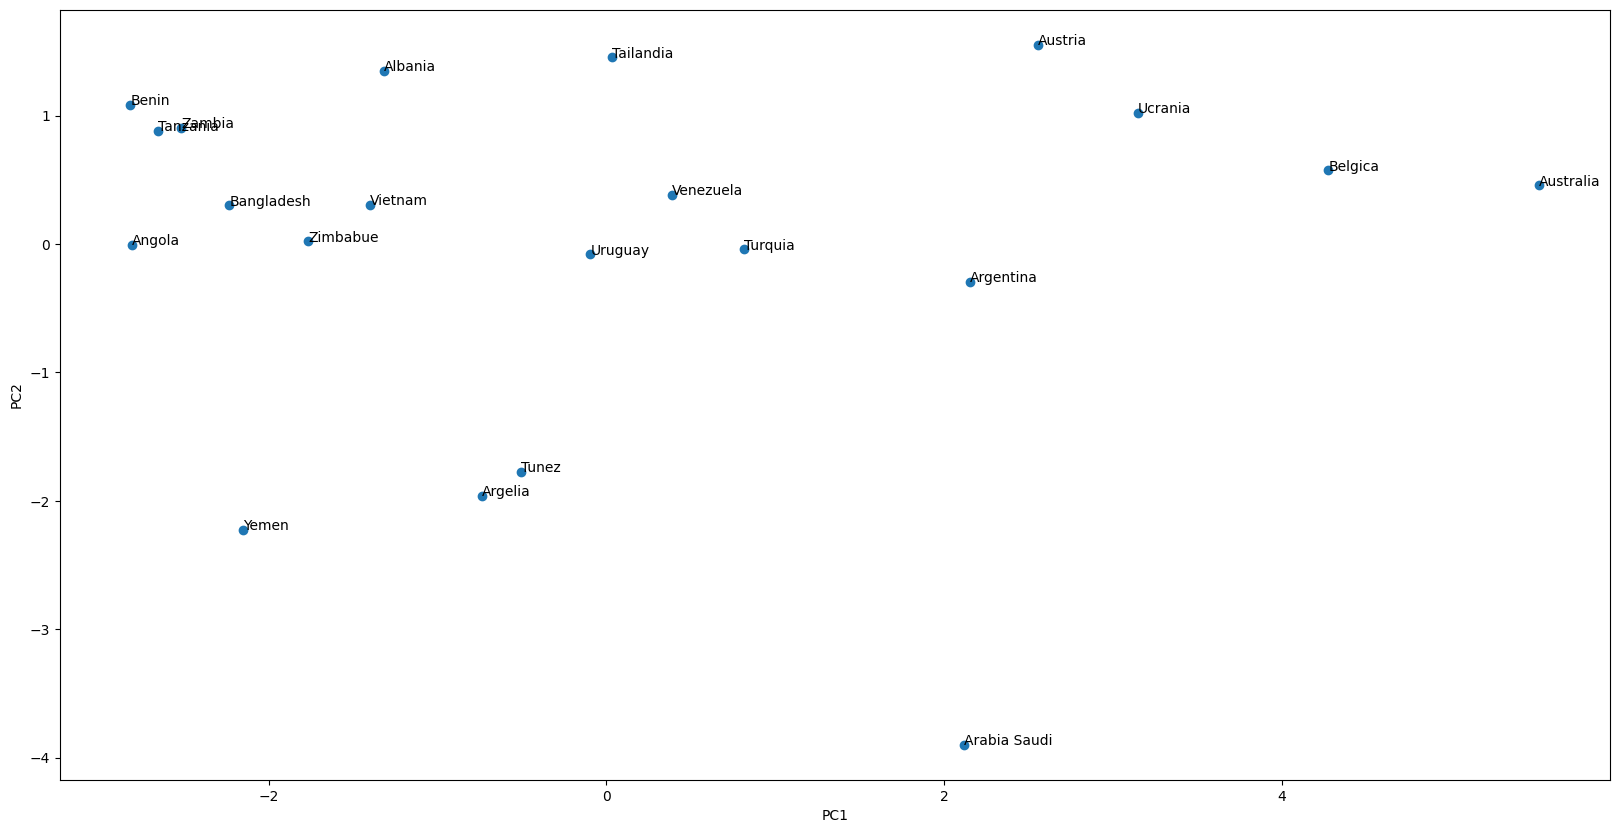

In [42]:
# Mostramos los datos proyectados en las dos componentes principales
x = principalComponents[:, 0] # Component 1
y = principalComponents[:, 1] # Component 2

plt.figure(figsize=(20, 10))
plt.scatter(x, y)

plt.xlabel('PC1')
plt.ylabel('PC2')

for i, txt in enumerate(country_name):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

Las variables corresponden a los siguientes indicadores:

1. **X1** = Tasa anual de crecimiento de la población
2. **X2** = Tasa de mortalidad infantil por cada 1000 nacidos vivos
3. **X3** = Porcentaje de mujeres en la población activa
4. **X4** = PNB en 1995 (en millones de dólares)
5. **X5** = Producción de electricidad (en millones kW/h)
6. **X6** = Líneas telefónicas por cada 1000 habitantes
7. **X7** = Consumo de agua per cápita
8. **X8** = Proporción de la superficie del país cubierta por bosques
9. **X9** = Proporción de deforestación anual
10. **X10** = Consumo de energía per cápita
11. **X11** = Emisión de CO2 per cápita

PC1 [-0.2310173  -0.33993251 -0.07854739  0.36550361  0.34726799  0.36237086
  0.3499393  -0.05893841 -0.16538036  0.38322688  0.37317805]
PC2 [-0.44730143 -0.00556818  0.65395026  0.06683083  0.05967963  0.14539461
 -0.03360871  0.52025475  0.23023469 -0.07897009 -0.10969521]


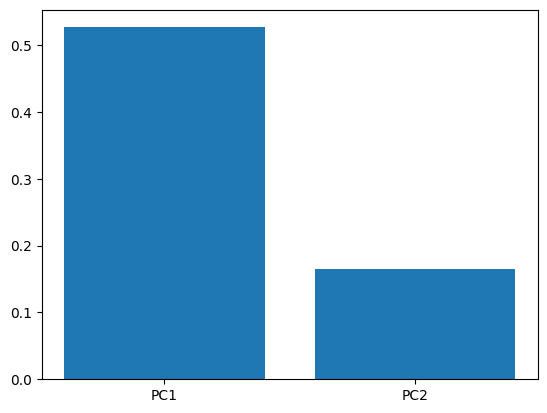

In [43]:
print("PC1", pca.components_[0])
print("PC2", pca.components_[1])

# Varianza explicada por cada componente
plt.bar(range(2), pca.explained_variance_ratio_)
plt.xticks(range(2), ['PC1', 'PC2'])
plt.show()

#print("Varianza explicada por cada componente: ", pca.explained_variance_ratio_)
# Vemos que la primera componente respresenta el desarrollo económico y la segunda componente 
# En este caso podriamos pensar que las dos componentes del pca serian dos variables eonomómicas pq la mayoria de variables son económicas, pero es un error
# la tarea del pca es aportar variables explicativas, las componentes son una combinacion lineal de todas las variables originales y por lo tanto representan
# dos componentes que explican la mayor varianza de los datos originales, por eso vemos que el grafico no muestra una relación clara entre los paises

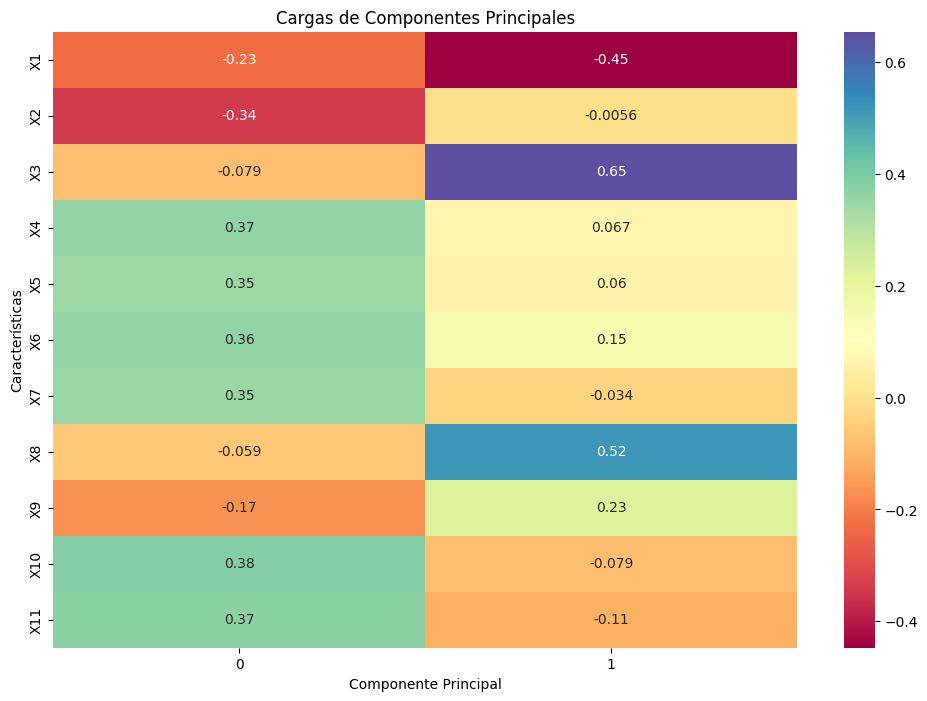

In [44]:
features = data.drop(columns=['Pais'])
plt.figure(figsize=(12, 8))
components = pd.DataFrame(pca.components_, columns=features.columns)
sns.heatmap(components.T, cmap='Spectral', annot=True)
plt.title('Cargas de Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Características')
plt.show()

## Análisis más exhaustivo con más componentes

1. **Gráfico de Codo** : Este gráfico te ayuda a determinar el número óptimo de componentes principales al mostrar la varianza explicada acumulada por cada componente.
2. **Gráfico de Cargas de Componentes** : Un mapa de calor que visualiza cómo cada característica original contribuye a las diferentes componentes principales.
3. **Análisis de Varianza Explicada Acumulada** : Un gráfico de barras que muestra la varianza explicada por cada componente individualmente y de forma acumulativa.
4. **Visualización 3D de los primeros tres componentes principales** : Un gráfico 3D que te permite explorar visualmente cómo los países se distribuyen en el espacio definido por las tres primeras componentes principales.
5. **Correlation Matrix** : Un heatmap que muestra las correlaciones entre los componentes principales y las variables originales, lo que ayuda a entender mejor las relaciones subyacentes.

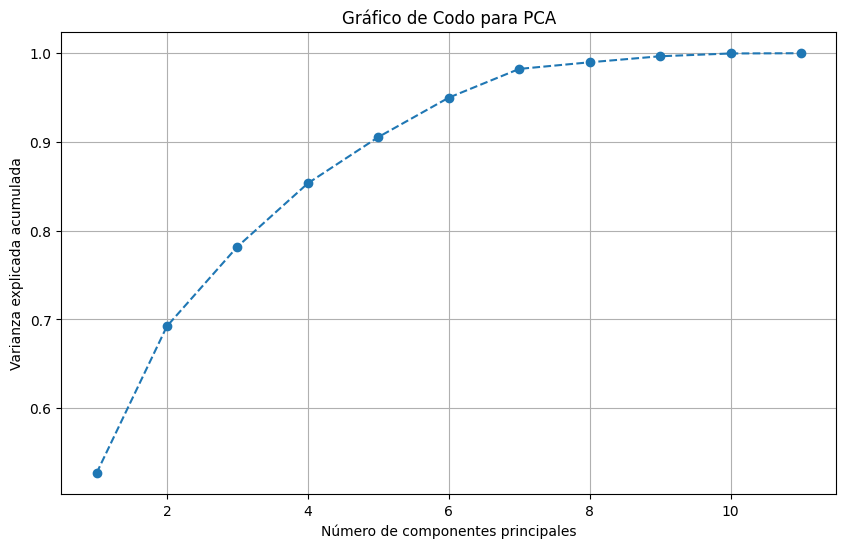

In [45]:
features = data.drop(columns=['Pais'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
pca = PCA()
pca.fit(scaled_data)

# 1. Gráfico de Codo (Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Gráfico de Codo para PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

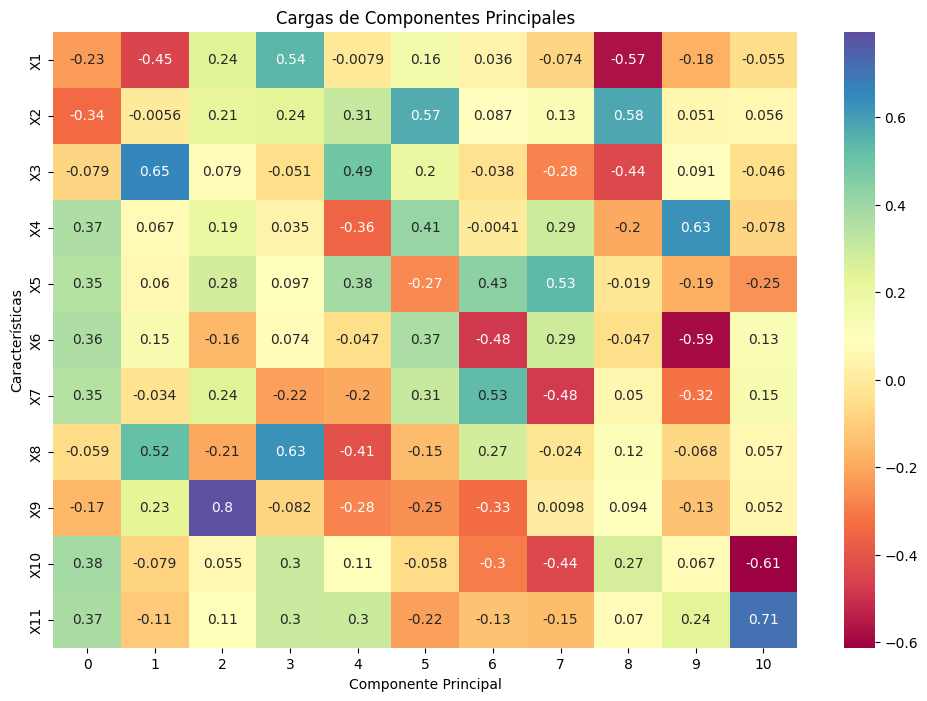

In [46]:
# 2. Gráfico de Cargas de Componentes
plt.figure(figsize=(12, 8))
components = pd.DataFrame(pca.components_, columns=features.columns)
sns.heatmap(components.T, cmap='Spectral', annot=True)
plt.title('Cargas de Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Características')
plt.show()

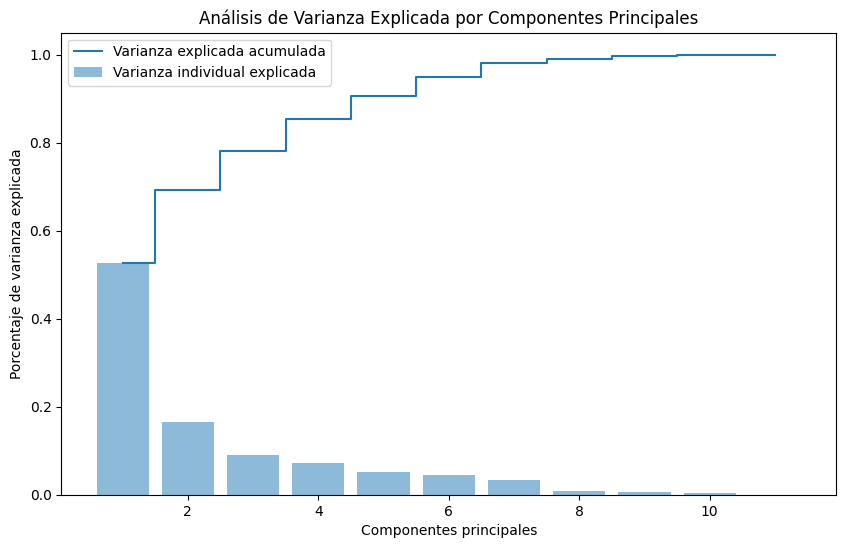

In [47]:
# 3. Análisis de Varianza Explicada Acumulada
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.legend(loc='best')
plt.title('Análisis de Varianza Explicada por Componentes Principales')
plt.show()

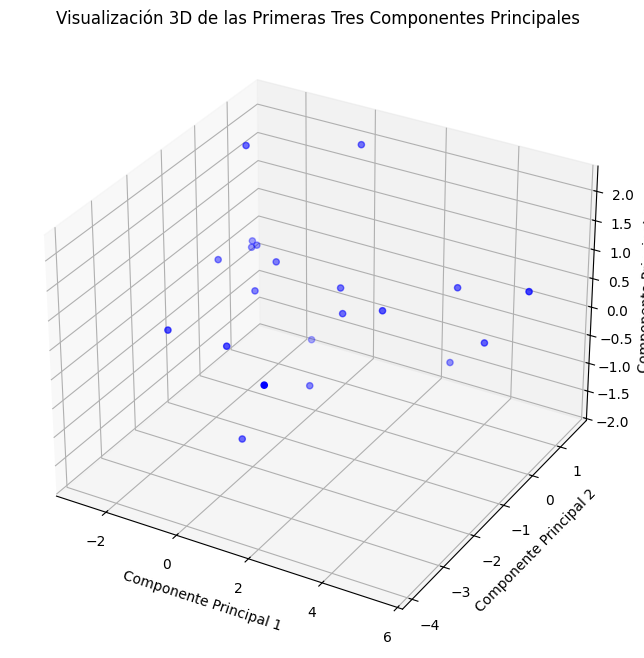

In [48]:
# 4. Visualización 3D de los primeros tres componentes principales
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(scaled_data)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2], c='blue', marker='o')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Visualización 3D de las Primeras Tres Componentes Principales')
plt.show()

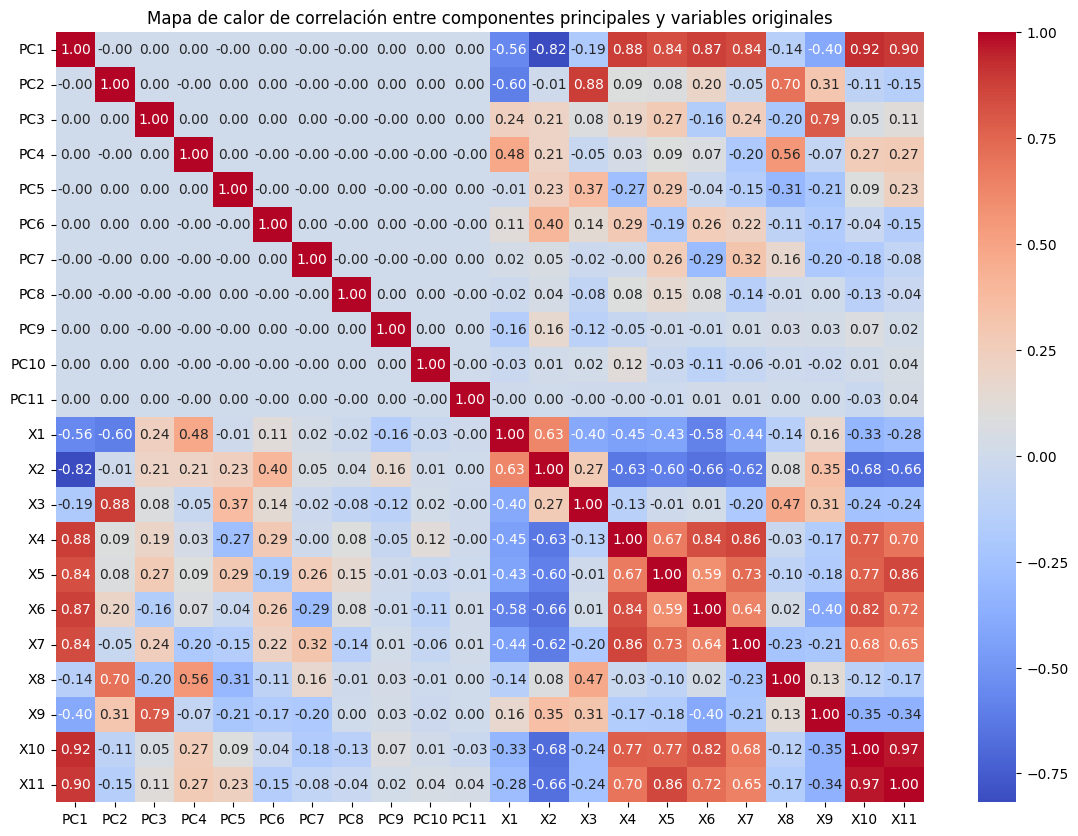

In [49]:
# 5. Mapa de calor de correlación entre componentes principales y variables originales
correlation_matrix = np.dot(pca.components_, scaled_data.T).T
correlation_df = pd.DataFrame(correlation_matrix, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
correlation_df = pd.concat([correlation_df, features.reset_index(drop=True)], axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación entre componentes principales y variables originales')
plt.show()

### Que hacemos cuando tenemos variables categóricas y variables numéricas?

Varianza explicada por cada componente: [0.33648048 0.17193955 0.09784496 0.08660156 0.06975169 0.06152795
 0.0524442  0.04626473 0.03145589 0.02112419 0.01001951 0.00673439
 0.00393055 0.00212781 0.00126289 0.00048965]
Varianza explicada acumulada: [0.33648048 0.50842003 0.606265   0.69286656 0.76261825 0.8241462
 0.8765904  0.92285513 0.95431101 0.9754352  0.98545471 0.99218911
 0.99611965 0.99824746 0.99951035 1.        ]


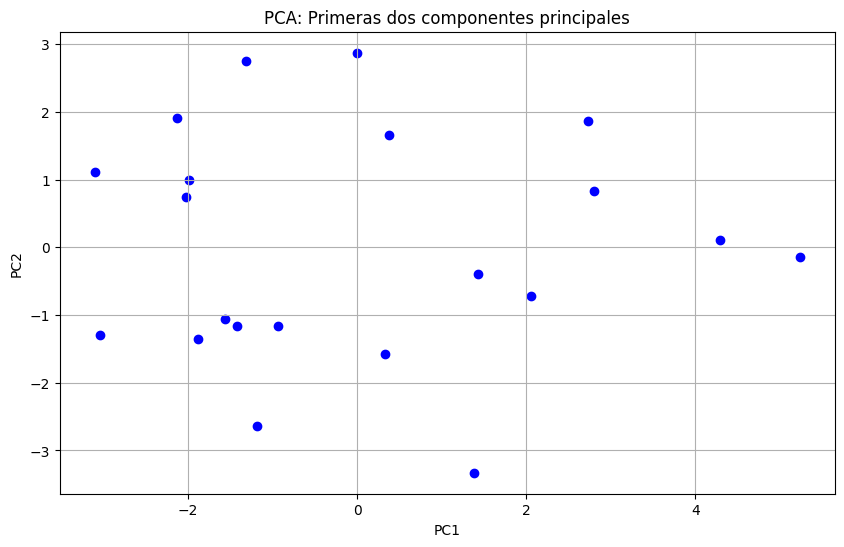

In [50]:
# Paso 1: Cargar los datos
data = pd.read_csv('countries_data_categorical.csv')

# Paso 2: One-Hot Encoding, if we want to see exactly how it's done we can go to get_dummies documentation
data_encoded = pd.get_dummies(data.drop(columns=['Pais']), drop_first=True)

data_encoded.to_csv('countries_data_encoded.csv', index=False)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

print("Varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Primeras dos componentes principales')
plt.grid(True)
plt.show()

In [51]:
print(data_encoded)

     X1   X2  X3      X4      X5   X6    X7  X8   X9   X10  Región_Asia  \
0   1.0   30  41    2199    3903   12    94  53  0.0   341         True   
1   3.0  124  46    4422     955    6    57  19  0.7    89        False   
2   4.3   21  13  133540   91019   96   497   1  0.0  4566        False   
3   2.5   34  24   44609   19883   42   180   2  0.8   906        False   
4   1.3   22  31  278431   65962  160  1043  22  0.1  1504        False   
5   1.4    6  43  337909  167155  510   933  19  0.0  5341        False   
6   0.6    6  41  216547   53259  465   304  47 -0.4  3301        False   
7   2.0   79  42   28599    9891    2   220   6  4.1    64        False   
8   0.3    8  40  250710   72236  457   917  20 -0.3  5120        False   
9   3.0   95  48    2034       6    5    26  45  1.3    20        False   
10  1.3   35  46  159630   71177   59   602  25  3.5   769         True   
11  3.1   82  49    3703    1913    3    40  38  1.2    34        False   
12  2.1   39  30   16369 